In [1]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs
import pandas as pd
import seaborn as sns
from utils import get_firing_field

device = 'cpu'

/Users/chingfang/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")
/Users/chingfang/Code/sr-project/datasets/sf_inputs_discrete.py:19: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


In [2]:
trained_dir = f'{configs.engram_dir}02_gamma_v_ss/'

In [33]:
results_file = trained_dir + 'results.p'
with open(results_file, 'rb') as f:
    results = pickle.load(f)

In [34]:
results.keys()

dict_keys(['nonlinearities', 'gammas', 'T_maes', 'M_maes'])

In [35]:
results['log_M_maes'] = np.log(results['M_maes'])

In [36]:
df = pd.DataFrame(results)

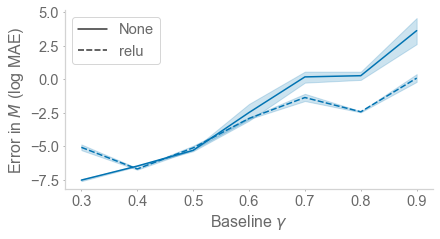

In [38]:
plt.figure(figsize=(6.4, 4.8*0.75))
g = sns.lineplot(x ='gammas', y='log_M_maes', style='nonlinearities', data=df)
g.get_legend().set_title(None)
plt.ylabel("Error in $M$ (log MAE)")
plt.xlabel("Baseline $\gamma$")
plt.tight_layout()
plt.savefig('3b_gammas.png', dpi=300)
plt.show()

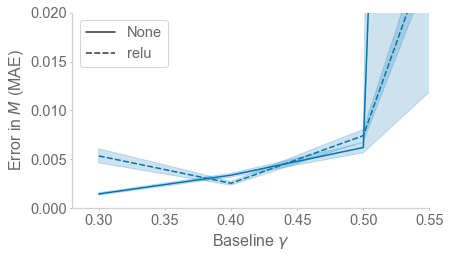

In [46]:
plt.figure(figsize=(6.4, 4.8*0.75))
g = sns.lineplot(x = 'gammas', y='M_maes', style='nonlinearities', data=df)
g.get_legend().set_title(None)
plt.ylabel("Error in $M$ (MAE)")
plt.xlabel("Baseline $\gamma$")
plt.ylim(0, 0.02)
plt.xlim(0.28, 0.55)
plt.savefig('3b_gammas_zoomed.png', dpi=300)
plt.show()